# Exercise 3

**Given a date interval in the format 'yyyy-mm-dd', plot data in the selected date interval. Repeate for a time interval ('hh:mm:ss')**

Reference: selectdata.ipynb

In [1]:
from datetime import datetime
from datetime import timezone
from datetime import time
from datetime import date
from pytz import timezone
from pytz import utc
from ROOT import TCanvas, TGraph
from array import array

Welcome to JupyROOT 6.18/04


In [2]:
tz = "Europe/Berlin"
local = timezone (tz)

In [3]:
doc = open("bme680.dat", "r")

In [4]:
data = doc.read().splitlines()

In [5]:
temperature = {}
humidity = {}
pressure = {}

In [6]:
for line in data:
    column = line.split()

    date = column[0]
    time = column[1]

    year = int(date.split('-')[0])
    month = int(date.split('-')[1])
    day = int(date.split('-')[2])
  
    hour  = int(time.split(':')[0])
    minutes  = int(time.split(':')[1])
    seconds  = int(float(time.split(':')[2]))
    
    local_datetime = local.localize(datetime(year, month, day, hour, minutes, seconds))
    utc_datetime = local_datetime.astimezone(utc)
    unixtime = utc_datetime.replace(tzinfo=utc).timestamp()
    
    temperature[unixtime] = float(column[2])
    humidity[unixtime] = float(column[3])
    pressure[unixtime] = float(column[4])

In [7]:
C1 = TCanvas('canvas', 'Temperature', 200, 10, 1000, 700)

In [8]:
x,y = array('d'), array('d')
xsel, ysel = array( 'd' ), array( 'd' )

In [9]:
timestamp1 = datetime(2020, 1, 11, 8, 0, 0).replace(tzinfo=utc).timestamp() 
timestamp2 = datetime(2020, 1, 11, 15, 0, 0).replace(tzinfo=utc).timestamp()

In [19]:
xmin = timestamp1
xmax = timestamp2
type(time)

float

In [11]:
for time,temp in temperature.items():
    if time>=xmin and time<=xmax:
        xsel.append(time)
        ysel.append(temp)

In [12]:
print(len(xsel))

2508


In [13]:
gr = TGraph(len(xsel), xsel, ysel )
gr.SetLineWidth(2)
gr.SetLineColor(4)
gr.SetTitle("Selected graph")
gr.GetXaxis().SetTitle("Time")
gr.GetYaxis().SetTitle("Temperature")
gr.GetXaxis().SetTimeDisplay(1)
gr.GetXaxis().SetTimeFormat("%Y/%m/%d %H:%M:%S %F1970-01-01 00:00:00");
gr.GetXaxis().SetNdivisions(404)

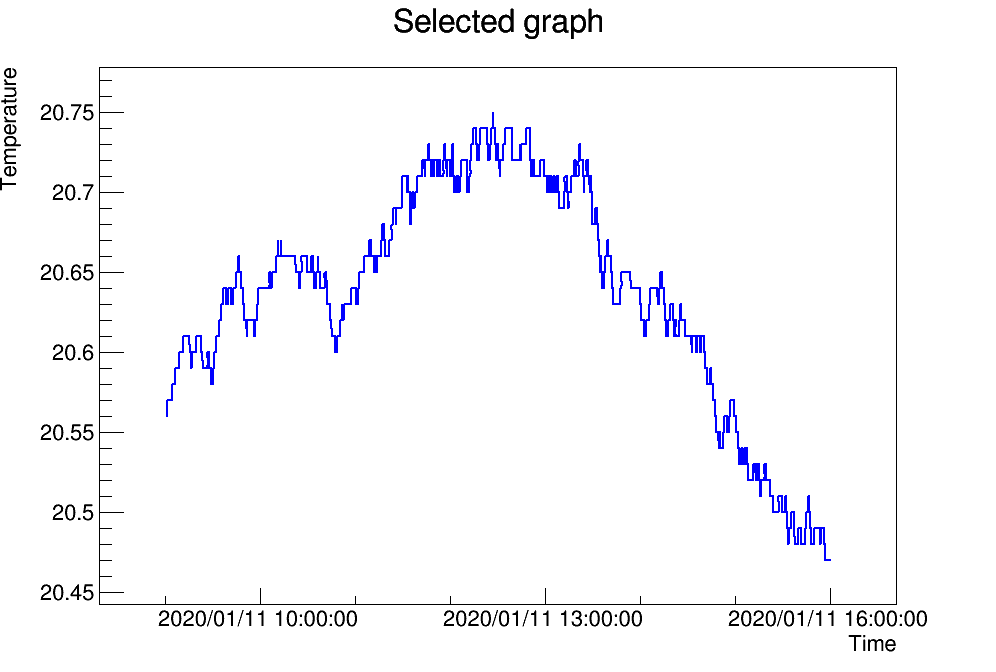

In [14]:
C1.Draw()
gr.Draw( 'AC' )